# What is stixdcpy
stixdcpy is a python package that facilitates access and analysis of data from the Spectrometer/Telescope for Imaging X-rays (STIX). 
stixdcpy provides APIs to query and download data from STIX data center (https://datacenter.stix.i4ds.net/). It also provides a set of tools for visualizing data and performing common analysis tasks. 
stixdcpy allows querying and downloading the following types of data from STIX data center:

- Quick-look light curves
- Housekeeping data
- Science data
- Energy calibration data
- Auxilary data
- STIX solar flare list



# Installation
```sh 
pip install git+https://github.com/drhlxiao/stixdcpy.git

```
# Citing stixdcpy
If you use stixdcpy in your work, please use the following citation,
```sh
@software{hualin_xiao_2022_6408689,
  author       = {Hualin Xiao},
  title        = {stixdcpy},
  month        = apr,
  year         = 2022,
  publisher    = {Zenodo},
  version      = {v1.0},
  doi          = {10.5281/zenodo.6408689},
  url          = {https://doi.org/10.5281/zenodo.6408689}
}
```
# Tutorial and documentation

- [Tutorial on Google Colab](https://colab.research.google.com/drive/17fQfbWjL0s0TpblbPL1Ysy_zFXj40FBf?usp=sharing)
- [Documentation](https://drhlxiao.github.io/stixdcpy/)
# Reporting Issues and Contributing

Open an issue on GitHub to report a problem. Pull requests welcome.

https://github.com/drhlxiao/stixdcpy



# Install dependencies 

In [4]:

!pip install git+https://github.com/drhlxiao/stixdcpy.git
!pip install numpy matplotlib pandas astropy


In [6]:
import numpy as np
import pandas as pd
from pprint import pprint
from datetime import timedelta
from matplotlib import pyplot as plt
from astropy.table import QTable
from stixdcpy.quicklook import LightCurves
from stixdcpy.energylut import EnergyLUT
from stixdcpy import ancillary as anc
from stixdcpy.net import FitsQuery
from stixdcpy.net import JSONRequest as jreq
from stixdcpy import instrument as inst
from stixdcpy.science import ScienceL1, Spectrogram
from stixdcpy.housekeeping import Housekeeping

%matplotlib inline

# Request Quick-look  data from STIX data center 

<AxesSubplot:xlabel='UTC + -6.76 (4 sec time bins)', ylabel='Counts'>

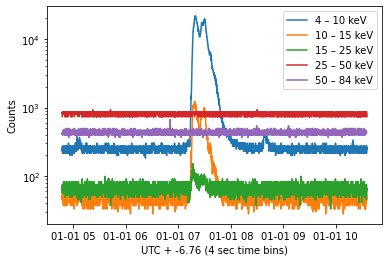

In [7]:

lc=LightCurves.from_sdc(start_utc='2022-01-01T05:00:00', end_utc='2022-01-01T10:00:00', ltc=True)
"""ltc:  boolean, optional
   True
     do light time correction if it is True, default value = False
"""
lc.peek()
#preview lightcurves


# Housekeep data

In [8]:
hk=Housekeeping.from_sdc('2021-09-06T12:00:00', '2021-09-06T14:00:00')
pprint(hk.param_names)


{'NIX00020': 'SID',
 'NIX00072': 'Med value of trig acc',
 'NIX00073': 'Max value of trig acc',
 'NIX00076': 'Attenuator motions',
 'NIX00078': 'HK_ASP_PHOTOA0_V',
 'NIX00079': 'HK_ASP_PHOTOA1_V',
 'NIX00080': 'HK_ASP_PHOTOB0_V',
 'NIX00081': 'HK_ASP_PHOTOB1_V',
 'NIX00085': 'FDIR function status',
 'NIX00094': 'Attenuator currents',
 'NIXD0001': 'SW Version Number',
 'NIXD0002': 'CPU load',
 'NIXD0003': 'Archive Memory usage',
 'NIXD0004': 'IDPU identifier',
 'NIXD0005': 'Active SPW link',
 'NIXD0021': 'SW running',
 'NIXD0022': 'Instrument number',
 'NIXD0023': 'Instrument mode',
 'NIXD0024': 'HK_PSU_TEMP_T',
 'NIXD0025': 'HK_DPU_PCB_T',
 'NIXD0026': 'HK_DPU_FPGA_T',
 'NIXD0027': 'HK_DPU_3V3_C',
 'NIXD0028': 'HK_DPU_2V5_C',
 'NIXD0029': 'HK_DPU_1V5_C',
 'NIXD0030': 'HK_DPU_SPW_C',
 'NIXD0031': 'HK_DPU_SPW0_V',
 'NIXD0032': 'HK_DPU_SPW1_V',
 'NIXD0035': 'HK_DPU_1V5_V',
 'NIXD0036': 'HK_REF_2V5_V',
 'NIXD0037': 'HK_DPU_2V9_V',
 'NIXD0038': 'HK_ASP_REF_2V5A_V',
 'NIXD0039': 'HK_ASP_REF_

<AxesSubplot:xlabel='UTC', ylabel='Value'>

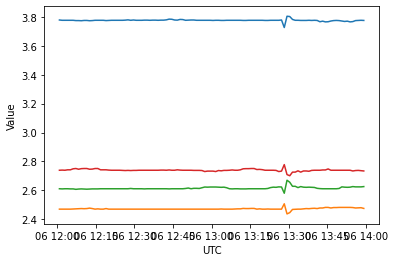

In [9]:
#plot housekeeping data time series 
hk.plot('NIX00078,NIX00079,NIX00080,NIX00081')
# parameter names


Text(0, 0.5, 'Mode')

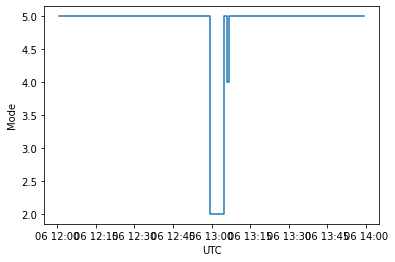

In [10]:
#Plot the raw values of a parameter 
plt.step( hk.data['datetime'], hk.data['raw_values']['NIXD0023'])
plt.xlabel('UTC')
plt.ylabel('Mode')

# Calibration data

In [11]:
elut=EnergyLUT.request('2021-09-03T00:00:00')

In [12]:
#Print onboard elut and calibration run information
elut.info()
#elut.data


{'calibration_run': {'duration': 86400,
                     'obs_begin': '2021-09-02T12:56:17.958',
                     'run_id': 1353},
 'onboard_elut': {'upload_time_range': ['2021-06-25T14:54:14.456',
                                        '2021-06-25T14:55:49.456']}}


In [13]:
lut=elut.get_pixel_true_ebins(pixel=34)
#print the energy range of bins of pixel 34 
pd.DataFrame(lut)

,0,1
0,0.007,3.998
1,3.998,4.996
2,4.996,5.993
3,5.993,6.991
4,6.991,7.989
5,7.989,8.987
6,8.987,9.984
7,9.984,10.982
8,10.982,11.980
9,11.980,12.978


# S/C Ephemeris 

<AxesSubplot:title={'center':'SOLO Location at 2022-01-01T00:00:00'}, xlabel='X (au)', ylabel='Y (au)'>

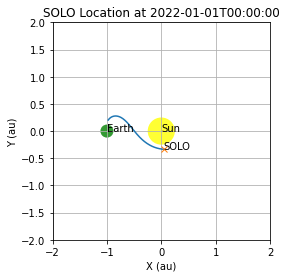

In [14]:
emph=anc.Ephemeris.from_sdc(start_utc='2022-01-01T00:00:00', end_utc='2022-03-31T01:00:00', steps=100)
emph.peek()

In [15]:
pprint(emph.data['orbit'])

{'earth_solo_r': [0.20442796186239046,
                  0.2070575378653606,
                  0.2096716090792991,
                  0.21226990719730157,
                  0.2148519855186511,
                  0.21741763840720574,
                  0.21996642798233296,
                  0.22249809997189712,
                  0.22501240633324335,
                  0.2275089346439051,
                  0.22998751283413418,
                  0.2324477502194804,
                  0.23488943795071407,
                  0.237312376053465,
                  0.23971620800169,
                  0.24210080963318298,
                  0.24446584649010958,
                  0.24681115873539825,
                  0.24913659432812132,
                  0.2514418504176951,
                  0.2537268466201589,
                  0.255991300803959,
                  0.2582350980488541,
                  0.2604581311096963,
                  0.2626601492484186,
                  0.26484111521789827,
   

# STIX pointing

<AxesSubplot:title={'center':'Solar center: [0.3, 0.3]  arcsec \n 2022-03-23T00:00:00 UT '}, xlabel='STIX X (arcsec)', ylabel='STIX Y (arcsec)'>

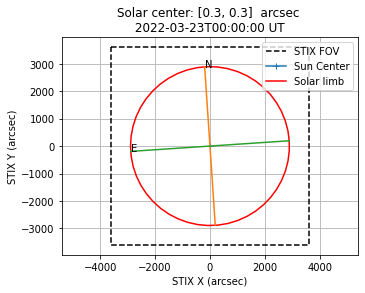

In [16]:
fov=anc.STIXPointing.from_sdc('2022-03-23T00:00:00')
fov.peek()

In [17]:
# data
pprint(fov.data)

{'cmat': [[0.9999999999981576, 1.3964921039832934e-06, 1.3172159596397393e-06],
          [-1.4813321725926087e-06, 0.9977680665131331, 0.0667748863304902],
          [-1.2210254195510473e-06, -0.06677488633231843, 0.9977680665133631]],
 'cmat_inv': [[0.9999999999981573,
               -1.4813321724726481e-06,
               -1.2210254197250719e-06],
              [1.3964921041146064e-06, 0.997768066513133, -0.06677488633231839],
              [1.317215959474113e-06, 0.06677488633049022, 0.9977680665133631]],
 'fov': {'x': [-3600, 3600, 3600, -3600, -3600],
         'y': [3600, 3600, -3600, -3600, 3600]},
 'frame': 'STIX_ILS',
 'limb': {'x': [2887.8669477144313,
                2839.4539902524352,
                2744.4271418827466,
                2604.3450888243947,
                2421.5058133056054,
                2198.909176556717,
                1940.2080052683314,
                1649.6484343978452,
                1332.0004388099183,
                992.4796574104714,
       

# Flare light time and relative angle calculator

In [18]:
flare_aux=jreq.request_flare_light_time_and_angle(utc='2022-03-01T00:00:00', flare_x=100, flare_y=1000, observer='stix')
"""
         
  calculate flare light times and relative angles 
        Parameters
        ----
            utc: str
                observation time
            flare_x: float
                flare helio-projective longitude in units of arcsec as seen by the observer
            flare_y: float
                flare helio-projective latitude in units of arcsec 
            observer: str
                observer. It can be either "earth" or "stix" . Default "earth"
        Returns
        ----
            data: dict
              light times and  angles
 'dt_flare':   difference of light time  between Flare-Earth and  Flare-STIX
 'dt_sun_center':  difference of light time  between SunCenter-Earth and  SunCenter-STIX
 'earth_flare_solo_deg':   Earth-Flare-SolO angle in units of degrees
 'earth_sun_lt':  Earth-SunCenter light time
 'flare_earth_lt':  Flare-Earth light time in units of seconds
 'flare_norm_earth_deg': Earth-Flare-normal  angle in units of seconds
 'flare_norm_solo_deg': SolO-Flare-normal  angle in units of seconds
 'flare_solo_lt': Flare-SolO light time
 'flare_solo_r': Flare-SolO distance in units of AU
 'flare_utc': '2022-03-01T00:00:00',
 'mk': SPICE kernel version,
 'observer': observer,
 'sun_solo_lt':  SUN-SolO light time in units of seconds
"""

pprint(flare_aux)

{'dt_flare': 206.8177569176426,
 'dt_sun_center': 206.73656806578168,
 'earth_flare_solo_deg': 9.415112828033102,
 'earth_sun_lt': 494.3731333687276,
 'flare_earth_lt': 492.60127441475606,
 'flare_norm_earth_deg': 40.31041075450781,
 'flare_norm_solo_deg': 37.15088597887103,
 'flare_solo_lt': 285.78351749711345,
 'flare_solo_r': 0.5727069694605329,
 'flare_utc': '2022-03-01T00:00:00',
 'mk': 'solo_ANC_soc-flown-mk_V107_20220411_001.tm',
 'observer': 'stix',
 'sun_solo_lt': 287.63656530294594}


# Science data

## Download and plot pixel data (L1A)

In [19]:

sci_data=ScienceL1.from_sdc(request_id=2112240046)
#Bulk science data request ids (also called unique ids) can be found on the science data web page https://datacenter.stix.i4ds.net/view/list/bsd
#sci_data is a data object 

In [20]:
hdul=sci_data.hdul
hdul.info()



Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-xray-l1-2112240046_20211224T100151-20211224T103108_037312_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      61   ()      
  1  CONTROL       1 BinTableHDU     31   1R x 8C   ['J', 'J', 'J', '3B', '3B', 'D', 'K', '32B']   
  2  DATA          1 BinTableHDU     45   504R x 12C   ['D', 'D', 'B', '144B', '32B', 'B', 'B', '16K', '16D', '12288D', '12288D', 'K']   
  3  ENERGIES      1 BinTableHDU     19   32R x 3C   ['K', 'D', 'D']   


In [21]:
hdul['PRIMARY'].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'SOLO/STIX'          / Telescope/Sensor name                          
INSTRUME= 'STIX    '           / Instrument name                                
OBSRVTRY= 'Solar Orbiter'      / Satellite name                                 
FILENAME= 'solo_L1A_stix-sci-xray-l1-2112240046_20211224T100151-20211224T10310&'
CONTINUE  '8_037312_V01.fits&'                                                  
CONTINUE  '' / FITS filename                                                    
DATE    = '2022-03-12T09:58:52.366' / FITS file creation date in UTC            
OBT_BEG = '0693655212:32736'                                                    
OBT_END = '0693656970:25987'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<AxesSubplot:title={'center':'Count rate spectrogram'}, xlabel='T0 at 2021-12-24T10:01:51.065 ', ylabel='Energy range(keV'>,
 <AxesSubplot:xlabel='seconds since 2021-12-24T10:01:51.065 ', ylabel='counts / sec'>,
 None,
 None)

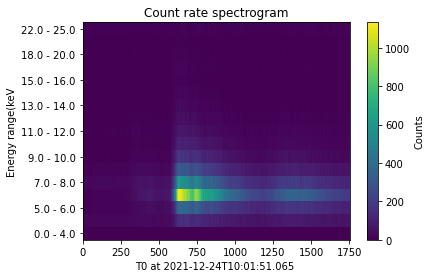

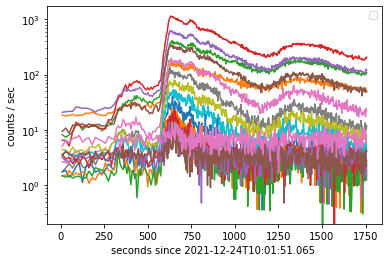

In [22]:
sci_data.peek('spg,lc')
#preview science data quicklook
#time shift corrected automatically
#data have been preprocessed

In [23]:
#let's print data object attributes 
dir(sci_data)

['T0_unix',
 'T0_utc',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'correct_live_time',
 'correct_pixel_count_rates',
 'count_rate_spectrogram',
 'counts',
 'data',
 'data_loaded',
 'data_type',
 'datetime',
 'dump',
 'duration',
 'ebins_high',
 'ebins_low',
 'ebins_mid',
 'energies',
 'energy_bin_mask',
 'energy_bin_names',
 'fname',
 'from_fits',
 'from_sdc',
 'get_data',
 'get_energy_range_slicer',
 'hdul',
 'is_time_bin_shifted',
 'light_time_corrected',
 'light_time_del',
 'load',
 'make_spectra',
 'max_ebin',
 'mean_pixel_rate_spectra',
 'mean_pixel_rate_spectra_err',
 'min_ebin',
 'peek',
 'pixel_count_rates',
 'pixel_counts',
 'rcr',
 'read_

In [24]:
sci_data.ebins_high

array([  4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
        15.,  16.,  18.,  20.,  22.,  25.,  28.,  32.,  36.,  40.,  45.,
        50.,  56.,  63.,  70.,  76.,  84., 100., 120., 150.,  inf])

In [25]:
#print(sci_data.url)
#link to science browser 

## Download and plot spectrograms

In [26]:
request_id=	2108150003
l4d=Spectrogram.from_sdc(request_id=request_id)
#fetch data from STIX data center

Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-spectrogram-2108150003_20210815T073948-20210815T083441_033101_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      61   ()      
  1  CONTROL       1 BinTableHDU     39   1R x 11C   ['J', 'J', 'J', '3B', '3B', 'D', 'J', '12B', '32B', 'K', '32B']   
  2  DATA          1 BinTableHDU     33   166R x 8C   ['D', 'D', 'B', 'K', 'D', '32D', '32D', 'K']   
  3  ENERGIES      1 BinTableHDU     19   32R x 3C   ['K', 'D', 'D']   


(<Figure size 576x432 with 5 Axes>,
 ((<AxesSubplot:title={'center':'Spectrogram'}, xlabel='Seconds since Nones ', ylabel='Energy range(keV'>,
   <AxesSubplot:xlabel='Seconds since Nones ', ylabel='Counts / sec'>),
  (<AxesSubplot:xlabel='Energy (keV)', ylabel='Counts'>,
   <AxesSubplot:xlabel='Seconds since Nones ', ylabel='Integration time (sec)'>)))

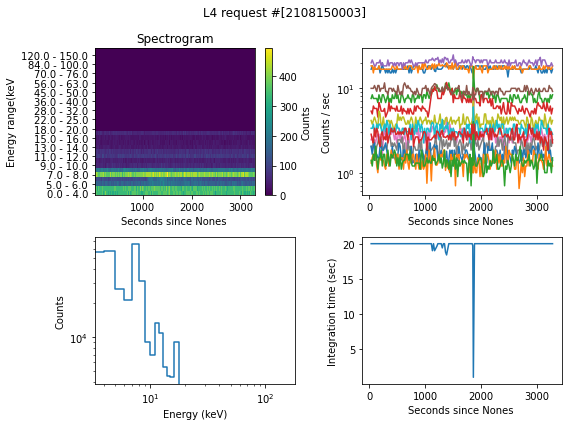

In [27]:
l4d.hdul.info()
l4d.peek()

# Search and download FITS files from STIX data center

In [28]:

res=FitsQuery.query('2022-02-10T05:00:00', '2022-02-28T07:00:00',product_type='l1',filter='BKG')

info="""product type Optional. 'a
   options:  
    'l0': 'xray_l0_user',
    'l1': 'xray_l1_user',
    'l2': 'xray_l2_user',
    'l3': 'xray_l3_user',
    'spec': 'spectrogram_user',
    'qlspec': 'ql_spectrogram',
    'aspect': 'aspect',
    'lc': 'ql_light_curves',
    'bkg': 'ql_background',
    'var': 'ql_variance',
    'ffl': 'flareflag_location',
    'cal': 'calibration_spectrum',
    'hkmin': 'hk_mini',
    'hkmax': 'hk_maxi',
    'housekeeping': [],
    'quicklook': quick-look data,
    'science': any science data types

Filter: optional. 
    Use to filter FITS files. Only science data with descriptions containing the specified string will be selected. 
    set it to None if you  don't want to filter the results

It returns a FitQueryResult object

"""


## Convert the query result to pandas dataframe 


In [29]:
df=res.to_pandas()
#URLs to download the fits file can be found in the data frame
df
#the table contains links to download the fits file

,url,observation_time_range,file_id
0,http://datacenter.stix.i4ds.net/download/fits/...,"[2022-02-10T14:21:05.350, 2022-02-10T15:14:25....",36309
1,http://datacenter.stix.i4ds.net/download/fits/...,"[2022-02-11T21:16:24.242, 2022-02-11T22:52:24....",36323
2,http://datacenter.stix.i4ds.net/download/fits/...,"[2022-02-12T10:48:09.526, 2022-02-12T12:34:49....",36324
3,http://datacenter.stix.i4ds.net/download/fits/...,"[2022-02-12T19:39:53.680, 2022-02-12T21:26:33....",36325
4,http://datacenter.stix.i4ds.net/download/fits/...,"[2022-02-13T17:08:47.414, 2022-02-13T18:17:27....",36326
5,http://datacenter.stix.i4ds.net/download/fits/...,"[2022-02-13T00:08:47.508, 2022-02-13T00:56:47....",36327
6,http://datacenter.stix.i4ds.net/download/fits/...,"[2022-02-15T07:04:11.549, 2022-02-15T07:52:11....",51272
7,http://datacenter.stix.i4ds.net/download/fits/...,"[2022-02-16T09:21:15.009, 2022-02-16T10:57:15....",51273
8,http://datacenter.stix.i4ds.net/download/fits/...,"[2022-02-16T19:10:11.070, 2022-02-16T20:46:11....",51274
9,http://datacenter.stix.i4ds.net/download/fits/...,"[2022-02-17T17:25:00.106, 2022-02-17T19:01:00....",51275


In [30]:
#If you want, you can download all the fits files:
fits_list=res.fetch()

In [31]:
#Read All fits files
hduls=res.open_fits()
#hduls is a list of hdu objects

In [32]:
#print file
res.fits_info()


Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-xray-l1-2202100022_20220210T142105-20220210T151425_036309_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      61   ()      
  1  CONTROL       1 BinTableHDU     31   1R x 8C   [J, J, J, 3B, 3B, D, K, 32B]   
  2  DATA          1 BinTableHDU     45   1R x 12C   [D, D, B, 144B, 32B, B, B, 16K, 16D, 12288D, 12288D, K]   
  3  ENERGIES      1 BinTableHDU     19   32R x 3C   [K, D, D]   
Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-xray-l1-2202110024_20220211T211624-20220211T225224_036323_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      61   ()      
  1  CONTROL       1 BinTableHDU     31   1R x 8C   [J, J, J, 3B, 3B, D, K, 32B]   
  2  DATA          1 BinTableHDU     45   1R x 12C   [D, D, B, 144B, 32B, B, B, 16K, 16D, 12288D, 12288D, K]   
  3  ENERGIES      1 B

Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-xray-l1-2202210001_20220221T114755-20220221T132355_051282_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      61   ()      
  1  CONTROL       1 BinTableHDU     31   1R x 8C   [J, J, J, 3B, 3B, D, K, 32B]   
  2  DATA          1 BinTableHDU     45   1R x 12C   [D, D, B, 144B, 32B, B, B, 16K, 16D, 12288D, 12288D, K]   
  3  ENERGIES      1 BinTableHDU     19   32R x 3C   [K, D, D]   
Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-xray-l1-2202210002_20220221T215748-20220221T233348_051283_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      61   ()      
  1  CONTROL       1 BinTableHDU     31   1R x 8C   [J, J, J, 3B, 3B, D, K, 32B]   
  2  DATA          1 BinTableHDU     45   1R x 12C   [D, D, B, 144B, 32B, B, B, 16K, 16D, 12288D, 12288D, K]   
  3  ENERGIES      1 B

# Download flare list

In [33]:
flares=jreq.fetch_flare_list('2021-04-08T00:00:00',  '2021-07-09T00:00:00', sort='goes' )
"""

sort flares. 
Flares can be sorted by: 
LC0
  flare peak counts of the 4 - 10 keV light curve 

LC1
  flare peak counts of 10 - 10 keV light curves
LC2
  similar to above, but of the third energy band
LC3
  similar to above, but of the fourth energy band
LC4
  similar to above, but of the fifth  energy band
time
  flare observation time
goes
  goes class 
"""
pd.DataFrame(flares)

,flare_id,duration,peak_UTC,LC0_BKG,_id,GOES_class,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,start_UTC,end_UTC,LC0_peak_counts_4sec
0,2105222301,308,2021-05-22T23:01:14.997,271.0,855,C6.9,NaN,240.0,0.0,2021-05-22T22:59:18.997,2021-05-22T23:04:26.997,29695
1,2104120458,768,2021-04-12T04:58:55.095,247.0,525,NA,0.000000,NaN,NaN,2021-04-12T04:52:19.095,2021-04-12T05:05:07.096,335
2,2105052247,460,2021-05-05T22:47:39.134,247.0,684,NA,0.000000,NaN,NaN,2021-05-05T22:43:51.134,2021-05-05T22:51:31.134,7935
3,2105052259,264,2021-05-05T22:59:27.135,247.0,686,NA,0.000000,NaN,NaN,2021-05-05T22:57:07.135,2021-05-05T23:01:31.135,303
4,2105100715,2856,2021-05-10T07:15:19.164,247.0,743,NA,0.000000,NaN,NaN,2021-05-10T07:03:23.163,2021-05-10T07:50:59.168,335
...,...,...,...,...,...,...,...,...,...,...,...,...
588,2105081840,1568,2021-05-08T18:40:07.243,247.0,711,C8.6,0.000009,790.0,280.0,2021-05-08T18:29:51.242,2021-05-08T18:55:59.245,51199
589,2105221710,448,2021-05-22T17:10:34.962,271.0,848,M1.2,0.000012,1050.0,290.0,2021-05-22T17:07:46.962,2021-05-22T17:15:14.962,86015
590,2105231106,628,2021-05-23T11:06:35.070,271.0,873,M1.2,0.000012,1040.0,320.0,2021-05-23T11:03:19.070,2021-05-23T11:13:47.071,55295
591,2105222135,584,2021-05-22T21:35:42.990,271.0,851,M1.5,0.000015,1050.0,320.0,2021-05-22T21:31:50.988,2021-05-22T21:41:34.991,77823


In [34]:
flares

[{'flare_id': '2105222301',
  'duration': 308,
  'peak_UTC': '2021-05-22T23:01:14.997',
  'LC0_BKG': 271.0,
  '_id': 855,
  'GOES_class': 'C6.9',
  'GOES_flux': None,
  'CFL_X_arcsec': 240.0,
  'CFL_Y_arcsec': 0.0,
  'start_UTC': '2021-05-22T22:59:18.997',
  'end_UTC': '2021-05-22T23:04:26.997',
  'LC0_peak_counts_4sec': 29695},
 {'flare_id': '2104120458',
  'duration': 768,
  'peak_UTC': '2021-04-12T04:58:55.095',
  'LC0_BKG': 247.0,
  '_id': 525,
  'GOES_class': 'NA',
  'GOES_flux': 0,
  'CFL_X_arcsec': None,
  'CFL_Y_arcsec': None,
  'start_UTC': '2021-04-12T04:52:19.095',
  'end_UTC': '2021-04-12T05:05:07.096',
  'LC0_peak_counts_4sec': 335},
 {'flare_id': '2105052247',
  'duration': 460,
  'peak_UTC': '2021-05-05T22:47:39.134',
  'LC0_BKG': 247.0,
  '_id': 684,
  'GOES_class': 'NA',
  'GOES_flux': 0,
  'CFL_X_arcsec': None,
  'CFL_Y_arcsec': None,
  'start_UTC': '2021-05-05T22:43:51.134',
  'end_UTC': '2021-05-05T22:51:31.134',
  'LC0_peak_counts_4sec': 7935},
 {'flare_id': '21050